In [113]:
import numpy as np
import cv2 as cv

from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## Load the images

left = cv.imread("input/flowers-left.png")
right = cv.imread("input/flowers-right.png")

%pylab inline
pylab.rcParams['figure.figsize'] = (20, 10)

plt.figure(frameon=False)
fig, (imgL, imgR) = plt.subplots(1, 2)
imgL.imshow(left)
imgR.imshow(right)

Now, convert the images to grayscale for better perfomance

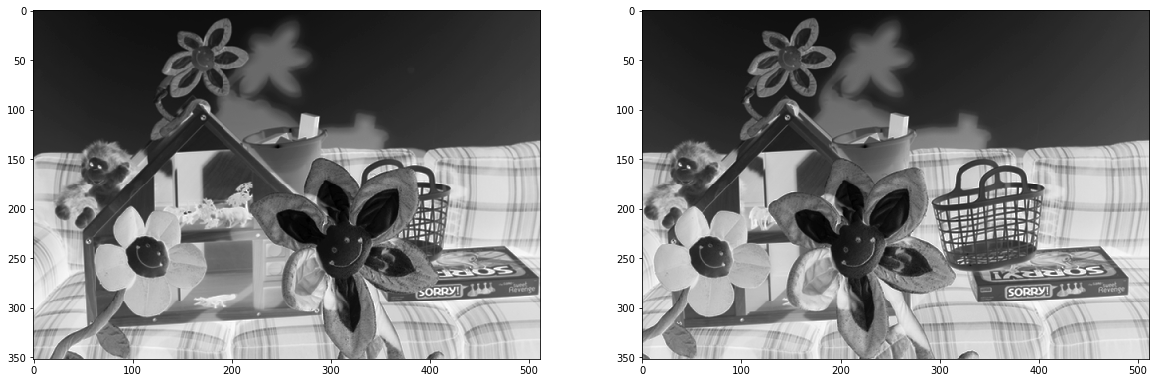

In [115]:
gray_left = cv.cvtColor(left, cv.COLOR_BGR2GRAY)
gray_right = cv.cvtColor(right, cv.COLOR_BGR2GRAY)

fig, (imgL, imgR) = plt.subplots(1, 2)
imgL.imshow(gray_left, cmap = plt.cm.binary)
imgR.imshow(gray_right, cmap = plt.cm.binary)

Define the patch (top-left position)

In [116]:
patch_loc = (120, 170)
patch_size = (100, 100)

Extract patch from the left image

Populating the interactive namespace from numpy and matplotlib


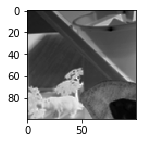

In [117]:
patch_left = gray_left[patch_loc[0]:patch_loc[0]+patch_size[0], patch_loc[1]:patch_loc[1]+patch_size[1]]

%pylab inline
pylab.rcParams['figure.figsize'] = (3, 2)
plt.imshow(patch_left, cmap=plt.cm.binary)

Extract strip from the right side

Populating the interactive namespace from numpy and matplotlib


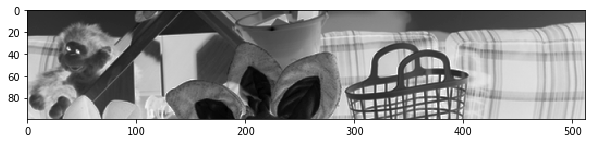

In [118]:
strip_right = gray_right[patch_loc[0]:patch_loc[0]+patch_size[0], :]

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 4)
plt.imshow(strip_right, cmap=plt.cm.binary)

## Implement the search for the best match

In [119]:
def best_x(patch, strip):
    min_diff = np.inf
    best_x = -1
    
    diffs = []
    
    patch_size = patch.shape
    number_of_cols = strip.shape[1] - patch.shape[1]
    for i in range(number_of_cols):
        other_patch = strip[:, i:i+patch_size[1]]
        diff = np.sum((patch-other_patch)**2)
        diffs.append(diff)
        
        if diff < min_diff:
            min_diff = diff
            best_x = i
    
    return best_x, diffs

### Plot the graph

Best x found at 147


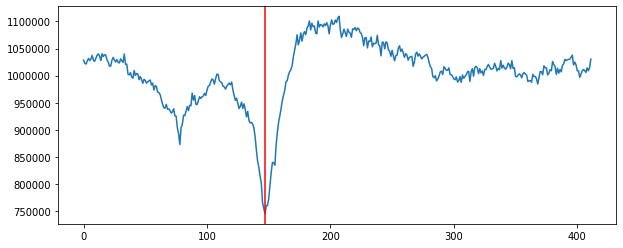

In [120]:
b_x, diffs = best_x(patch_left, strip_right)
plt.plot(diffs)
plt.axvline(x=b_x,color='red')
print ("Best x found at " + str(b_x))